In [1]:
#plt.savefig('path+filename', bbox = 'tight', transparent = True)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import sklearn.ensemble as ek
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
malware_data = pd.read_csv('C:\\Users\\zeeshan lone\\Desktop\\datasets\\MalwareData.csv', sep = '|', low_memory = False)
malware_data_frame = pd.DataFrame(malware_data)

In [5]:
malware_data_frame[0:1]
#or malware_data_frame.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.0,216,18032,0,16,1


In [6]:
malware_data_frame.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [7]:
malware_data_frame.groupby(malware_data_frame['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

In [8]:
x = malware_data_frame.drop(['Name','md5','legitimate'], axis = 1)
y = malware_data_frame['legitimate'].values
print(x[0:3])
print(y[0:3])

   Machine  SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0      332                   224              258                   9   
1      332                   224             3330                   9   
2      332                   224             3330                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   

   SizeOfUninitializedData  AddressOfEntryPoint  BaseOfCode  ...  ExportNb  \
0                        0                 6135        4096  ...         0   
1                        0                81778        4096  ...         0   
2                        0               350896        4096  ...         1   

   ResourcesNb  ResourcesMeanEntropy  ResourcesMinEntropy  \
0            4              3.262823             2.568844   
1            2              4.2

In [9]:
#extratrees classifier fits a number of ranomised decision trees on various sub samples of the data to imrove predictive.acc
#this is actually used as parameter here for the feature selection
#the features contributing the most are selected automatically
extratrees = ek.ExtraTreesClassifier()
extratrees.fit(x,y)
model = SelectFromModel(extratrees, prefit = True)
x_new = model.transform(x)
nbfeatures = x_new.shape[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
nbfeatures
#here only 9 features have been selected by the feature selector
#print(nbfeatures)

13

In [11]:
#cross validation is used to divide the dataset into random train test subset
#it is just like train_test_split() but ranomising the selection of the data in
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y, test_size = 0.2, shuffle = True, random_state = 42)

In [12]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][nbfeatures]

In [13]:
for f in range(nbfeatures):
    #print("%d. features %s (%f)"%(f+1, malware_data_frame.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(malware_data_frame.columns[2+f])

In [25]:
model = {
    "DecisionTree":tree.DecisionTreeClassifier(max_depth = 10),
    "RandomForest":ek.RandomForestClassifier(n_estimators = 50),
    "AdaBoost":ek.AdaBoostClassifier(n_estimators = 50),
    "GradientBoosting":ek.GradientBoostingClassifier(n_estimators = 50),
    "GaussianNB":GaussianNB(),
    "LinearRegression":LinearRegression()
}

In [26]:
#training each model with the xtrain and Ytrain then testing with Xtest and Ytest
results = {}
for algorithm in model:
    clf = model[algorithm]
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print("Algorithm: {}, Score: {}".format(algorithm, score))
    results[algorithm] = score

Algorithm: DecisionTree, Score: 0.9911626222383194
Algorithm: RandomForest, Score: 0.9943860919956538
Algorithm: AdaBoost, Score: 0.9862730894603404
Algorithm: GradientBoosting, Score: 0.9883375588554871
Algorithm: GaussianNB, Score: 0.6972473741398044
Algorithm: LinearRegression, Score: 0.5957596910849402


In [28]:
we_have_winner = max(results, key=results.get)
we_have_winner = 'AdaBoost'
print(we_have_winner)

AdaBoost


In [34]:
#now we save the model which won among the above models
#joblib.dump(model[we_have_winner], 'classifier.pkl', compress = 1) for file compressed as only one
joblib.dump(model[we_have_winner], 'classifier.pkl')

['classifier.pkl']

In [35]:
'''
import numpy as np
from scikit-learn.externals import joblib

vector = np.arange(0, 10**7)

%timeit joblib.dump(vector, 'vector.pkl')
# 1 loops, best of 3: 818 ms per loop
# file size ~ 80 MB
%timeit vector_load = joblib.load('vector.pkl')
# 10 loops, best of 3: 47.6 ms per loop

# Compressed
%timeit joblib.dump(vector, 'vector.pkl', compress=1)
# 1 loops, best of 3: 1.58 s per loop
# file size ~ 15.1 MB
%timeit vector_load = joblib.load('vector.pkl')
# 1 loops, best of 3: 442 ms per loop

# Pickle
%%timeit
with open('vector.pkl', 'wb') as f:
    pickle.dump(vector, f)
# 1 loops, best of 3: 927 ms per loop
%%timeit                                    
with open('vector.pkl', 'rb') as f:
    vector_load = pickle.load(f)
# 10 loops, best of 3: 94.1 ms per loop
'''

"\nimport numpy as np\nfrom scikit-learn.externals import joblib\n\nvector = np.arange(0, 10**7)\n\n%timeit joblib.dump(vector, 'vector.pkl')\n# 1 loops, best of 3: 818 ms per loop\n# file size ~ 80 MB\n%timeit vector_load = joblib.load('vector.pkl')\n# 10 loops, best of 3: 47.6 ms per loop\n\n# Compressed\n%timeit joblib.dump(vector, 'vector.pkl', compress=1)\n# 1 loops, best of 3: 1.58 s per loop\n# file size ~ 15.1 MB\n%timeit vector_load = joblib.load('vector.pkl')\n# 1 loops, best of 3: 442 ms per loop\n\n# Pickle\n%%timeit\nwith open('vector.pkl', 'wb') as f:\n    pickle.dump(vector, f)\n# 1 loops, best of 3: 927 ms per loop\n%%timeit                                    \nwith open('vector.pkl', 'rb') as f:\n    vector_load = pickle.load(f)\n# 10 loops, best of 3: 94.1 ms per loop\n"

In [36]:
open('features.pkl', 'wb').write(pickle.dumps(features))
#with open('features.pkl', 'wb') as f:
    #pickle.dump(mylist, f)

295

In [37]:
clf = model[we_have_winner]
res = clf.predict(x_new)
mt = confusion_matrix(y, res)
print("False positive rate : {}".format((mt[0][1]/float(sum(mt[0])))*100))
print("False negative rate : {}".format((mt[1][0]/float(sum(mt[1])))*100))

False positive rate : 0.8012489144369547
False negative rate : 2.86765239697021


In [21]:
print(features)
print(malware_data_frame.columns)
all_columns = malware_data_frame.columns


['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment']
Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'S

In [22]:
removed_columns = []
for cols in malware_data_frame.columns:
    if cols not in features:
        removed_columns.append(cols)
removed_columns.pop(-1)
print(removed_columns)

['Name', 'md5', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize', 'ResourcesMinSize', 'ResourcesMaxSize', 'LoadConfigurationSize', 'VersionInformationSize']


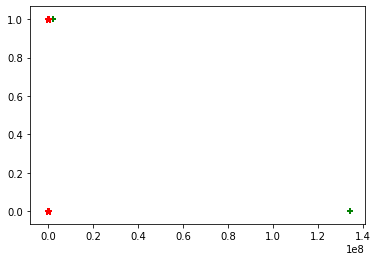

In [23]:
#feature are selected columns
#malware_data_frame.columns are all columns present
#removed_columns are columns which have been removed by feature selection
#now we will analyse the the types with the matplot lib

%matplotlib inline
plt.scatter(malware_data_frame['SectionAlignment'], malware_data_frame['legitimate'], color = 'green', marker = '+')
plt.scatter(malware_data_frame['FileAlignment'], malware_data_frame['legitimate'], color = 'blue', marker = '.')
plt.scatter(malware_data_frame['MajorOperatingSystemVersion'], malware_data_frame['legitimate'], color = 'red', marker = '*')
plt.show()

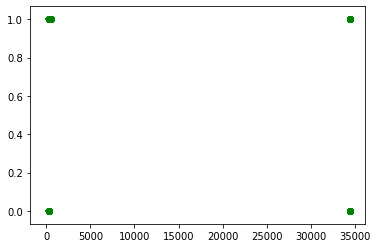

In [23]:
plt.scatter(malware_data_frame['Machine'], malware_data_frame['legitimate'], color = 'green')
plt.scatter(malware_data_frame['SizeOfOptionalHeader'], malware_data_frame['legitimate'], color = 'green', marker = '+')
plt.show()

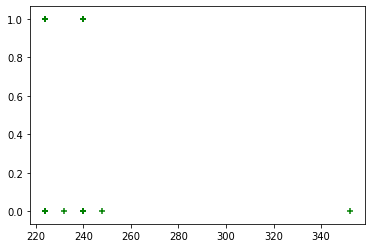

In [24]:
plt.scatter(malware_data_frame['SizeOfOptionalHeader'], malware_data_frame['legitimate'], color = 'green', marker = '+')
plt.show()

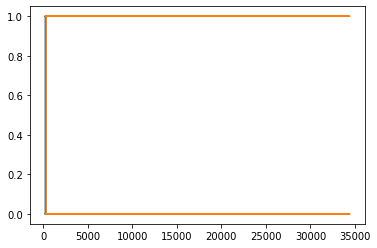

In [25]:
plt.plot(malware_data_frame['SizeOfOptionalHeader'], malware_data_frame['legitimate'])
plt.plot(malware_data_frame['Machine'], malware_data_frame['legitimate'])

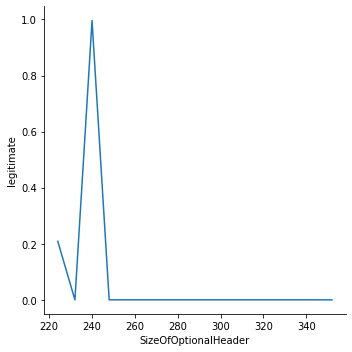

In [26]:
import seaborn as sns
sns.relplot(x='SizeOfOptionalHeader', y='legitimate', kind="line", data=malware_data_frame)

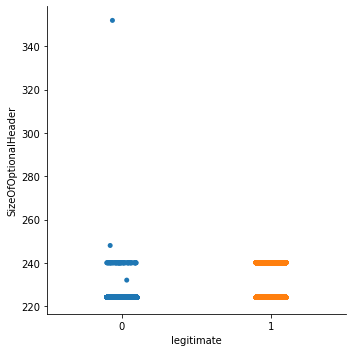

In [27]:
sns.catplot(x="legitimate", y="SizeOfOptionalHeader", data=malware_data_frame)

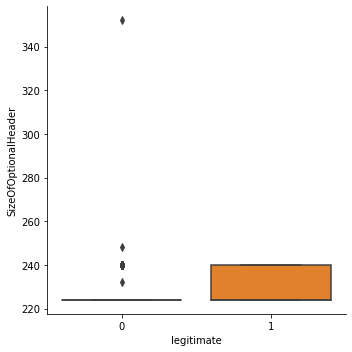

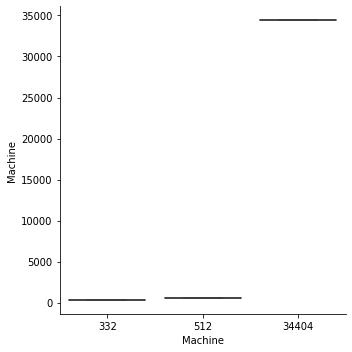

In [28]:
sns.catplot(x="legitimate", y="SizeOfOptionalHeader",kind = 'box', data=malware_data_frame)
sns.catplot(x="Machine", y="Machine",kind = 'box', data=malware_data_frame)


In [ ]:
#python pefile library will be used to extract the features from the file 
#for now we will be using peheaders to anaylse any file apart from its behavioural reports

